Project for "Data mining", spring 2019 
Melania Berbatova

Data from https://www.kaggle.com/snapcrack/all-the-news/data


## Data Exploration

In [2]:
import numpy as np
import pandas as pd 
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('./articles1.csv',
                   encoding='utf-8')
data1 = pd.read_csv('./articles2.csv',
                    encoding='utf-8')
data2 = pd.read_csv('./articles3.csv',
                    encoding='utf-8')

text = pd.concat([data, data1, data2])
text.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [ ]:
len(text)

## Using TF-IDF vectorize the articles


In [2]:
text_content = text['content']
vector = TfidfVectorizer(stop_words = 'english')
tfidf = vector.fit_transform(text_content)
text_content.head()

0    WASHINGTON  —   Congressional Republicans have...
1    After the bullet shells get counted, the blood...
2    When Walt Disney’s “Bambi” opened in 1942, cri...
3    Death may be the great equalizer, but it isn’t...
4    SEOUL, South Korea  —   North Korea’s leader, ...
Name: content, dtype: object

## Visualizing the data using t-SNE 

t-SNE is a tool for data visualization. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted easily. Local similarities are preserved by this embedding.

In [4]:
#For high-dimensional sparse data it is helpful to first reduce the dimensions to 50 dimensions with TruncatedSVD and then perform t-SNE. This will usually improve the visualization.

from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfidf)



In [23]:
#t-NSE embeddings 

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 142570 samples in 1.599s...
[t-SNE] Computed neighbors for 142570 samples in 3492.838s...
[t-SNE] Computed conditional probabilities for sample 1000 / 142570
[t-SNE] Computed conditional probabilities for sample 2000 / 142570
[t-SNE] Computed conditional probabilities for sample 3000 / 142570
[t-SNE] Computed conditional probabilities for sample 4000 / 142570
[t-SNE] Computed conditional probabilities for sample 5000 / 142570
[t-SNE] Computed conditional probabilities for sample 6000 / 142570
[t-SNE] Computed conditional probabilities for sample 7000 / 142570
[t-SNE] Computed conditional probabilities for sample 8000 / 142570
[t-SNE] Computed conditional probabilities for sample 9000 / 142570
[t-SNE] Computed conditional probabilities for sample 10000 / 142570
[t-SNE] Computed conditional probabilities for sample 11000 / 142570
[t-SNE] Computed conditional probabilities for sample 12000 / 142570
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 130000 / 142570
[t-SNE] Computed conditional probabilities for sample 131000 / 142570
[t-SNE] Computed conditional probabilities for sample 132000 / 142570
[t-SNE] Computed conditional probabilities for sample 133000 / 142570
[t-SNE] Computed conditional probabilities for sample 134000 / 142570
[t-SNE] Computed conditional probabilities for sample 135000 / 142570
[t-SNE] Computed conditional probabilities for sample 136000 / 142570
[t-SNE] Computed conditional probabilities for sample 137000 / 142570
[t-SNE] Computed conditional probabilities for sample 138000 / 142570
[t-SNE] Computed conditional probabilities for sample 139000 / 142570
[t-SNE] Computed conditional probabilities for sample 140000 / 142570
[t-SNE] Computed conditional probabilities for sample 141000 / 142570
[t-SNE] Computed conditional probabilities for sample 142000 / 142570
[t-SNE] Computed conditional probabilities for sample 142570 / 142570
[t-SNE] Mean sigma: 

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\melania\Anaconda3\envs\text-mining\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 720x360 with 0 Axes>

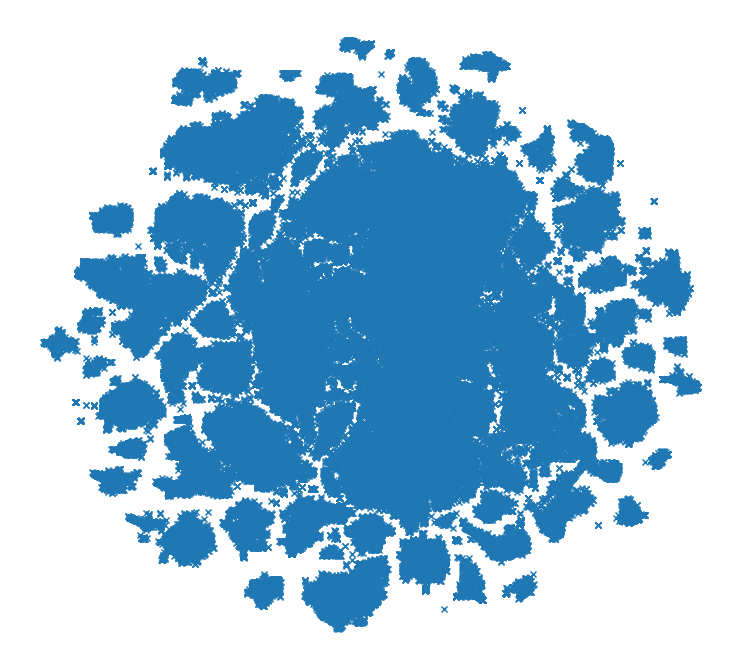

In [29]:
#visualizing 

figure(figsize=(10, 5))
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], marker="x")


In [5]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(X_reduced[:100])

<Figure size 720x360 with 0 Axes>

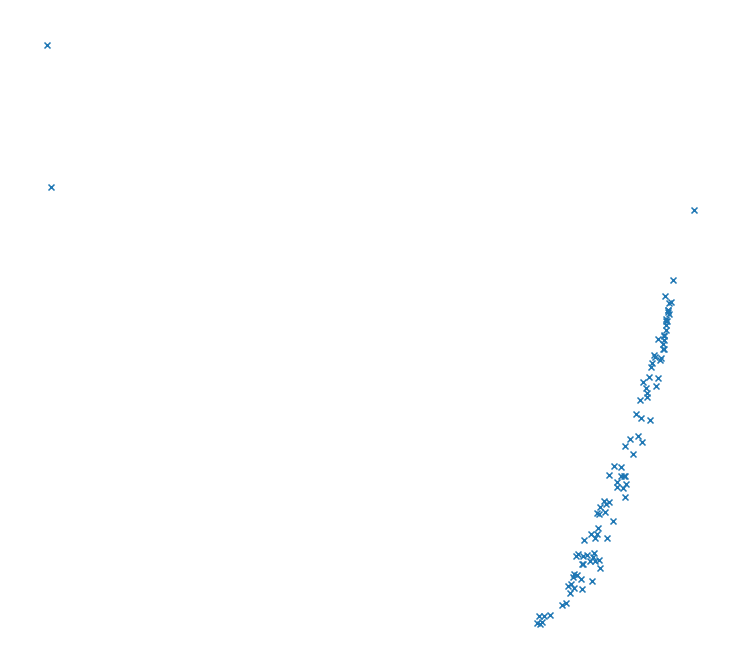

In [8]:
figure(figsize=(10, 5))
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_transformed[:, 0], X_transformed[:, 1], marker="x")

**3. Using elbow method to decide cluster number**

Introduction to [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) - One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. 

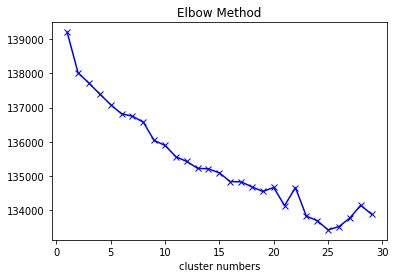

In [5]:
K = range(1,30)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k,batch_size = 300)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()



## Using MiniBatchKMean to cluster

[Comparison of the K-Means and MiniBatchKMeans clustering algorithms](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py)

In [9]:
k = 4
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

import time

start = time.time()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 
    
end = time.time()
print(end - start)


cluster0:
['said', 'people', 'new', 'police', 'like', 'says', 'just', 'percent', 'year', 'time', 'years', 'company', 'women', 'state', 'told']
cluster1:
['clinton', 'comey', 'trump', 'fbi', 'said', 'investigation', 'intelligence', 'hillary', 'flynn', 'russia', 'campaign', 'russian', 'president', 'emails', 'email']
cluster2:
['said', 'korea', 'syria', 'north', 'military', 'iran', 'china', 'isis', 'syrian', 'nuclear', 'russia', 'islamic', 'united', 'forces', 'trump']
cluster3:
['trump', 'clinton', 'said', 'president', 'republican', 'donald', 'campaign', 'obama', 'cruz', 'house', 'mr', 'republicans', 'party', 'people', 'hillary']
0.0


In [12]:
labels = kmeans.labels_
labels

array([3, 0, 0, ..., 0, 0, 0])

In [ ]:
cluster0:
['apple', 'tesla', 'company', 'google', 'uber', 'yahoo', 'iphone', 'musk', 'ceo', 'cars', 'companies', 'billion', 'car', 'microsoft', 'business']
cluster1:
['trump', 'clinton', 'said', 'mr', 'president', 'campaign', 'donald', 'republican', 'hillary', 'obama', 'house', 'cruz', 'presidential', 'people', 'election']
cluster2:
['said', 'people', 'new', 'like', 'twitter', 'just', 'news', 'trump', 'time', 'women', 'breitbart', 'president', 'year', 'clinton', 'years']
cluster3:
['said', 'police', 'mr', 'state', 'people', 'united', 'attack', 'president', 'government', 'security', 'states', 'isis', 'officers', 'obama', 'law']
0.0024802684783935547


In [14]:
centers

array([[ 11401, 151447,  33829, ..., 111890, 111889,  86949],
       [156192,  32158, 132283, ..., 104605, 104606,  86949],
       [132283, 115182, 105792, ...,  38832,  38831, 126433],
       [132283, 118304, 102249, ..., 101308, 101309,  86949]], dtype=int64)

In [17]:
k = 8
kmeans8 = MiniBatchKMeans(n_clusters = k)
kmeans8.fit(tfidf)
centers = kmeans8.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

import time

start = time.time()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 
    
end = time.time()
print(end - start)

cluster0:
['women', 'abortion', 'men', 'woman', 'female', 'said', 'clinton', 'gender', 'trump', 'sexual', 'like', 'people', 'abortions', 'rights', 'percent']
cluster1:
['said', 'people', 'says', 'like', 'new', 'just', 'company', 'time', 'year', 'years', 'world', 'don', 'news', 'million', 'way']
cluster2:
['said', 'police', 'state', 'president', 'trump', 'people', 'government', 'obama', 'court', 'states', 'percent', 'united', 'new', 'law', 'security']
cluster3:
['health', 'obamacare', 'care', 'insurance', 'republicans', 'house', 'zika', 'repeal', 'medicaid', 'tax', 'trump', 'said', 'plan', 'coverage', 'people']
cluster4:
['iran', 'iranian', 'nuclear', 'deal', 'saudi', 'tehran', 'sanctions', 'said', 'obama', 'rouhani', 'arabia', 'missile', 'trump', 'administration', 'iranians']
cluster5:
['cyber', 'fed', 'bank', 'security', 'panel', 'central', 'records', 'breaches', 'committee', 'reserve', 'letter', 'federal', 'information', 'financial', 'incident']
cluster6:
['trump', 'clinton', 'said',

In [18]:
labels8 = kmeans8.labels_

In [20]:
k = 15
kmeans15 = MiniBatchKMeans(n_clusters = k)
kmeans15.fit(tfidf)
centers = kmeans15.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

import time

start = time.time()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 
    
end = time.time()
print(end - start)

cluster0:
['holcomb', 'marijuana', 'raid', 'plant', 'massachusetts', 'pot', 'helicopter', 'plants', 'gazette', 'police', 'legalization', 'harmless', 'deploying', 'relatively', 'related2016']
cluster1:
['clinton', 'sanders', 'hillary', 'trump', 'campaign', 'democratic', 'said', 'state', 'bernie', 'obama', 'presidential', 'president', 'email', 'emails', 'party']
cluster2:
['syria', 'isis', 'said', 'syrian', 'iran', 'islamic', 'military', 'forces', 'turkey', 'state', 'iraq', 'russia', 'assad', 'war', 'attack']
cluster3:
['academy', 'directors', 'members', 'branch', 'film', 'allain', 'percent', 'oscar', 'hollywood', 'industry', 'lurie', 'black', 'executives', 'diverse', 'movies']
cluster4:
['percent', 'billion', 'market', 'fed', 'growth', 'said', 'bank', 'oil', 'rate', 'economy', 'prices', 'investors', 'inflation', 'year', 'company']
cluster5:
['baculum', 'intromission', 'mating', 'brindle', 'opie', 'humans', 'mammals', 'species', 'monogamy', 'penis', 'prolonged', 'bones', 'competition', '

In [22]:
labels15 = kmeans15.labels_

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
#X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(min_samples=15).fit(tfidf)



In [33]:
labels = clustering.labels_

In [29]:
terms = vector.get_feature_names()

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(tfidf, labels)

-0.28282663725918494

### Siluette score 

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(tfidf, labels)

0.0014008221057970548

In [19]:
silhouette_score(tfidf, labels8)

0.0011935398272406295

In [26]:
silhouette_score(tfidf, labels15)

-0.004136263256630926

## Topics modeling 

Here I use NMF instead of LDA because LDA's calculation is time-consuming. 

The major topics consist of politics, society, finance and internetional affairs, which is quite similiar to our cluster result.

In [25]:
from sklearn.decomposition import NMF

nmf  = NMF(n_components = 4)
nmf.fit(tfidf)
for i in range(0,k):
    word_list=[]
    print("Topic%d:"% i)
    for j in nmf.components_.argsort()[i,-16:-1]:
        word_list.append(terms[j])
    print(word_list)

Topic0:
['presidential', 'obama', 'party', 'gop', 'election', 'white', 'said', 'republicans', 'mr', 'house', 'cruz', 'campaign', 'republican', 'donald', 'president']
Topic1:
['going', 'company', 'think', 'don', 'health', 'years', 'time', 'year', 'women', 'new', 'just', 'says', 'like', 'percent', 'said']
Topic2:
['candidate', 'email', 'percent', 'election', 'party', 'fbi', 'presidential', 'emails', 'bernie', 'state', 'voters', 'campaign', 'democratic', 'hillary', 'sanders']
Topic3:
['korea', 'government', 'united', 'russian', 'officials', 'north', 'military', 'security', 'obama', 'president', 'syria', 'state', 'russia', 'mr', 'police']
Topic4:


IndexError: index 4 is out of bounds for axis 0 with size 4